**1. Phân nhóm chữ số viết tay**

In [81]:
import numpy as np
from PIL.Image import Image
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

In [80]:
from display_network import *

mndata = MNIST('MNIST/') # path to your MNIST folder 
mndata.load_testing()
X = mndata.test_images
X0 = np.asarray(X)[:1000,:] / 256.0
X = X0

K = 10
kmeans = KMeans(n_clusters=K).fit(X)

pred_label = kmeans.predict(X)

<class 'numpy.ndarray'>
(784, 10)


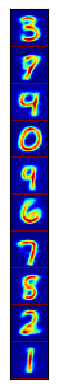

In [105]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()

Text(0.5, 1.0, 'The Nearest Point')

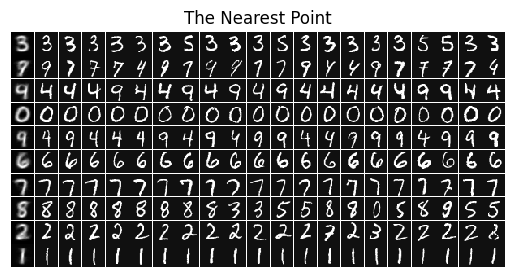

In [106]:
# try select 20 image nearest center
N0 = 20
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X0[pred_label == k, :]

    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(n_neighbors=N0).fit(Xk)
    dist, nearest_id  = neigh.kneighbors(center_k, N0)

    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]

B1 = display_network(X1.T, K, N0)
B = display_network(X2.T, K, N0)
# the first column is centers
C = np.concatenate((A, B), axis=1)
D = np.concatenate((A, B1), axis=1)

plt.axis('off')
plt.imshow(D, interpolation='nearest')
plt.gray()
plt.title('The Nearest Point')

Text(0.5, 1.0, 'The 20 First Point')

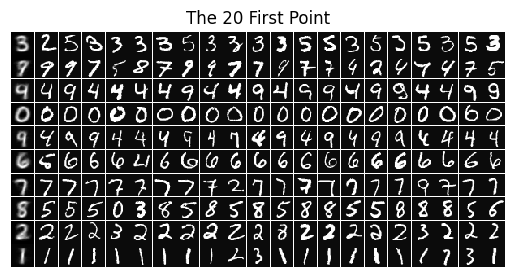

In [107]:

plt.axis('off')
plt.imshow(C, interpolation='nearest')
plt.gray()
plt.title('The 20 First Point')

**2. Object Segmentation (tách vật thể trong ảnh)**

Đặt vấn đề
Chúng ta cùng thử áp dụng thuật toán K-means clustering vào một bài toán xử lý ảnh khác: tách vật thể.

Giả sử chúng ta có bức ảnh dưới đây và muốn một thuật toán tự động nhận ra vùng khuôn mặt và tách nó ra.

![](https://machinelearningcoban.com/assets/kmeans/girl3.jpg)

Ý tưởng

Bức ảnh có ba màu chủ đạo: hồng ở khăn và môi; đen ở mắt, tóc, và hậu cảnh; màu da ở vùng còn lại của khuôn mặt. Vậy chúng ta có thể áp dụng thuật toán K-means clustering để phân các pixel ảnh thành 3 clusters, sau đó chọn cluster chứa phần khuôn mặt (phần này do con người làm).

Đây là một bức ảnh màu, mỗi điểm ảnh sẽ được biểu diễn bới 3 giá trị tương ứng với màu Red, Green, và Blue (mỗi giá trị này cũng là một số tự nhiên không vượt quá 255). Nếu ta coi mỗi điểm dữ liệu là một vector 3 chiều chứa các giá trị này, sau đó áp dụng thuật toán K-means clustering, chúng ta có thể có kết quả mong muốn



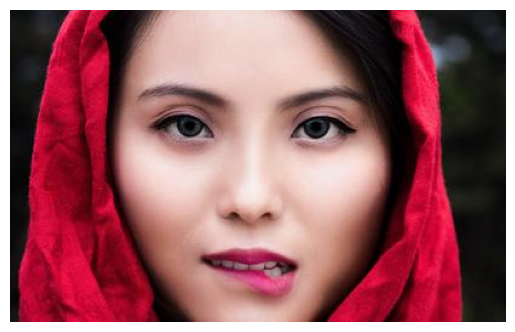

In [108]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

img = mpimg.imread('girl3.jpg')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show() 

In [122]:
# mỗi hàng là một pixel và có 3 giá trị màu
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

In [126]:
def kmeans_segmentation(X, K):
    kmeans = KMeans(n_clusters=K).fit(X)
    labels = kmeans.predict(X)

    img4 = np.zeros_like(X)
    for k in range(K):
        img4[labels == k] = kmeans.cluster_centers_[k]

    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()

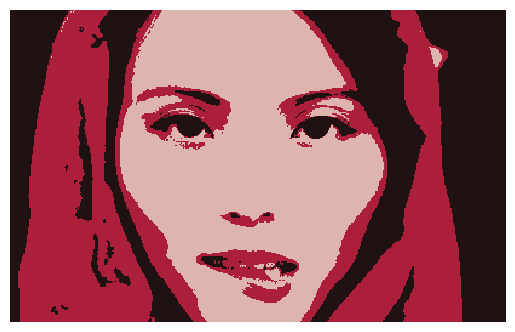

In [128]:
kmeans_segmentation(X, 3)

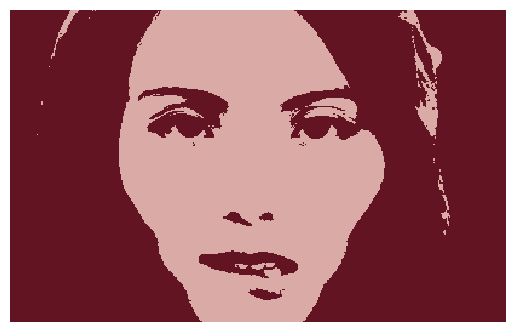

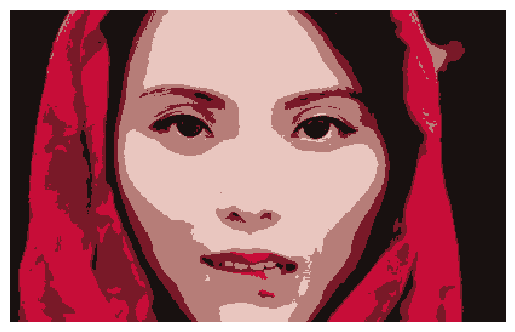

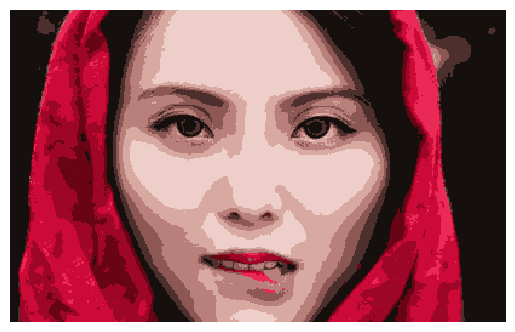

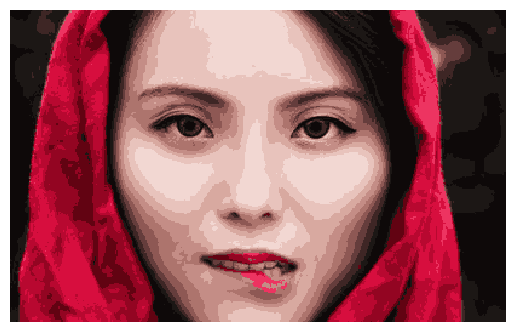

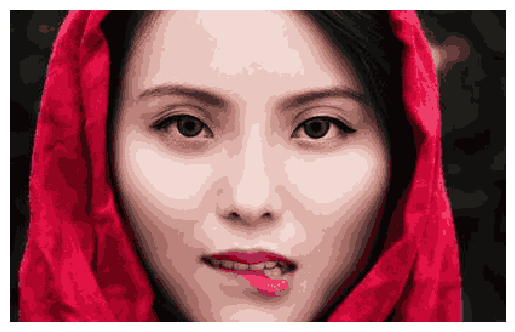

In [127]:
for K in [2, 5, 10, 15, 20]:
    kmeans_segmentation(X, K)
    